In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df = pd.read_csv(r"chipset_circuits.csv")
df.head(2)

,number,Vgate1,Vsource1,Vdrain1,Vgate2,Vsource2,Vdrain2,MemPE,length,xlocation,...,Tau2-source1,Tau2-Source2,Qcoll-drain1,Qcoll-drain2,Qcoll-Source1,Qcoll-Source2,radius,DE,FE,Fault
0,1,0,0,0,0,0,0,0.01,1.46,-0.1,...,3.380000e-10,3.380000e-10,1.710000e-15,4.090000e-16,2.260000e-15,4.320000e-16,0.267,0.064254,0.038625,0
1,2,0,0,0,0,0,0,0.01,1.46,0.0,...,3.370000e-10,3.370000e-10,2.110000e-15,5.010000e-16,2.270000e-15,5.170000e-16,0.267,0.063002,0.096769,1


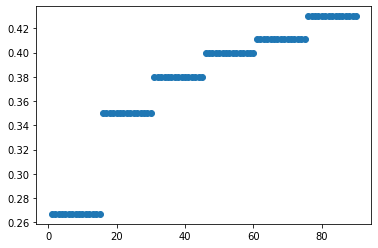

In [2]:
plt.scatter(df['number'],df['radius'])

In [3]:
df=df.astype('float32')

In [4]:
#df.columns.get_loc('radius')
X=df.iloc[:,:27].values
y=df.iloc[:,df.columns.get_loc('radius')].values

In [5]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)
y.head(2)

,0
0,0.267
1,0.267


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [7]:
print(X_train.shape)
print(y_train.shape)

(63, 27)
(63, 1)


In [9]:
print(X_test.shape)
print(y_test.shape)

(27, 27)
(27, 1)


In [10]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [11]:
clf.predict(X_test)

array([[0.28553855],
       [0.37480956],
       [0.40921074],
       [0.39547688],
       [0.37846887],
       [0.4018708 ],
       [0.44827962],
       [0.41100952],
       [0.40173244],
       [0.44051522],
       [0.40243146],
       [0.27792907],
       [0.44873232],
       [0.44996187],
       [0.39814442],
       [0.4066499 ],
       [0.39927894],
       [0.3465113 ],
       [0.4345799 ],
       [0.34435636],
       [0.39535633],
       [0.3855561 ],
       [0.41067553],
       [0.2772123 ],
       [0.38356337],
       [0.28525907],
       [0.33622685]], dtype=float32)

In [12]:
clf.score(X_test, y_test)

0.9489569953412862

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
76,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,6.00,0.00,...,7.410000e-12,7.520000e-12,3.400000e-10,3.410000e-10,3.400000e-10,3.370000e-10,1.110000e-14,1.850000e-15,1.130000e-14,2.530000e-15
26,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,2.74,0.55,...,6.410000e-12,1.030000e-11,2.840000e-10,3.370000e-10,3.390000e-10,3.370000e-10,1.300000e-15,5.640000e-15,1.460000e-15,5.660000e-15


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=50)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 203, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\mu

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [15]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X_train, y_train, cv=5)
scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

nan

In [20]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

In [18]:
!pip install msgpack
from skbio import stats 
from skbio.stats.ordination import OrdinationResults

     -------------------------------------- 69.8/69.8 KB 158.7 kB/s eta 0:00:00


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


C:\ProgramData\Anaconda3\lib\site-packages\skbio\stats\ordination\_ordination_results.py:285: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


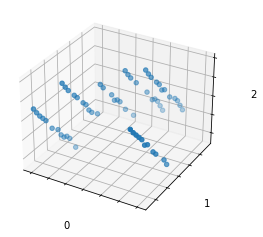

In [19]:
#Redunduncy Analysis
rdaG1=stats.ordination.rda(X_train, y_train, scale_Y=False, scaling=1)
rdaG1

In [21]:
rdaD1=rdaG1.features
rdaD1.head(2)

,RDA1,RDA2,RDA3,RDA4,RDA5,RDA6,RDA7,RDA8,RDA9,RDA10,RDA11,RDA12,RDA13,RDA14,RDA15,RDA16,RDA17,RDA18
0,-14.667451,-1.468411e+01,2.293161e-01,0.025478,0.458816,1.939457e-02,1.543272e-04,-9.136813e-04,2.860851e-04,1.682410e-04,3.659541e-10,1.175041e-10,7.008871e-11,-1.840776e-12,1.618526e-11,1.839410e-12,-5.728730e-13,1.072060e-11
1,0.000000,-1.019538e-16,1.631261e-15,0.000000,0.000000,7.167355e-14,-5.389853e-13,5.439364e-13,3.272957e-13,3.781163e-12,6.601650e-08,2.449439e-07,4.119733e-07,-1.711654e-07,7.093961e-06,1.067306e-05,-2.065146e-05,-4.555063e-05


In [22]:
rdaD2=rdaG1.samples
rdaD2.head(2)

,RDA1,RDA2,RDA3,RDA4,RDA5,RDA6,RDA7,RDA8,RDA9,RDA10,RDA11,RDA12,RDA13,RDA14,RDA15,RDA16,RDA17,RDA18
87,-2.901019,-1.100214,0.001559,-0.004754,-0.006140,0.000034,6.582453e-07,8.308530e-07,1.155856e-06,4.845591e-07,-3.081943e-12,1.807553e-13,1.844370e-13,1.629192e-13,-3.265249e-14,1.999379e-13,-5.091693e-14,1.479837e-15
46,-0.109293,0.768447,-0.023435,-0.007851,-0.000708,0.000011,-2.749930e-06,-2.998228e-06,1.390654e-07,9.160121e-10,-8.712467e-14,6.801482e-13,2.715857e-13,-1.319117e-12,2.303679e-13,-5.951907e-14,-3.097680e-14,-1.624849e-13


In [23]:
from scipy.special import comb
import scipy.misc
import cv2
import pytesseract
from pytesseract import Output
scipy.misc.comb = comb
import ecopy as ep

In [24]:
rdaG1.proportion_explained

RDA1     6.814963e-01
RDA2     3.044715e-01
RDA3     7.857243e-03
RDA4     3.768335e-03
RDA5     2.391318e-03
RDA6     1.299563e-05
RDA7     1.029755e-06
RDA8     7.097358e-07
RDA9     3.091152e-07
RDA10    2.383625e-07
RDA11    1.313644e-12
RDA12    8.037635e-13
RDA13    6.688192e-13
RDA14    5.258961e-13
RDA15    5.969504e-14
RDA16    2.529871e-14
RDA17    2.005062e-14
RDA18    1.498072e-14
dtype: float64

In [25]:
print(rdaG1.biplot_scores)

   RDA1          RDA2          RDA3          RDA4          RDA5          RDA6  \
0  -1.0  8.811294e-17  5.286776e-18 -3.172066e-17 -9.692423e-18  4.581873e-17   

           RDA7          RDA8          RDA9         RDA10  ...         RDA18  \
0 -9.692423e-18  1.691768e-16  2.158767e-17 -2.026598e-17  ... -2.644379e-17   

          RDA19         RDA20         RDA21         RDA22         RDA23  \
0 -6.608470e-19 -2.290936e-17  3.524518e-17  2.467162e-17 -2.456148e-17   

          RDA24         RDA25         RDA26         RDA27  
0  3.876969e-17 -1.515367e-17  2.287936e-17 -3.511066e-16  

[1 rows x 27 columns]


In [26]:
rdaG1.eigvals

RDA1     1.970952e+02
RDA2     8.805606e+01
RDA3     2.272389e+00
RDA4     1.089838e+00
RDA5     6.915919e-01
RDA6     3.758460e-03
RDA7     2.978150e-04
RDA8     2.052623e-04
RDA9     8.939907e-05
RDA10    6.893671e-05
RDA11    3.799184e-10
RDA12    2.324560e-10
RDA13    1.934289e-10
RDA14    1.520942e-10
RDA15    1.726437e-11
RDA16    7.316627e-12
RDA17    5.798829e-12
RDA18    4.332568e-12
dtype: float64